## Word Cloud

* 대한민국 헌법 코퍼스

In [ ]:
from konlpy.corpus import kolaw
corpus = kolaw.open('constitution.txt').read()
print(len(corpus))  # 문자 수
print(corpus[:100])

18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


In [2]:
type(corpus)

str

* 정규표현식으로 정제

In [3]:
import re

def text_clean(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern, '', text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern, '', text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거    
    text = re.sub(pattern, '', text)
    pattern = '([a-zA-Z0-9]+)'   # 알파벳, 숫자 제거  
    text = re.sub(pattern, '', text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern, '', text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern, '', text)
    return text  

In [4]:
corpus = text_clean(corpus)
print(corpus[:100])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 민주이념을 계승하고 조국의 민주개혁과 평화적 통일의 사명에 입각하


In [ ]:
len(corpus)   # 정제후... (일부 문제 제거)

17796

* 형태소 분리로 토큰화

In [6]:
# 형태소 분석
from konlpy.tag import Okt 

okt = Okt()
tokens = okt.nouns(corpus)  # 명사만 추출

print(tokens[:50])    

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제사', '회문', '모든', '영역']


In [7]:
len(tokens)

3871

In [8]:
stop_words = "기타 헌법"
stop_words = stop_words.split(" ")

st_tokens = []
for token in tokens:
  if token not in stop_words:
    st_tokens.append(token)

tokens = st_tokens    # 변수의 편의성을 위해 다시 tokens로 변수명을 바꿔줌.
# tokens

In [9]:
len(tokens)

3793

* 2글자 이상인 토큰만 선택

In [10]:
tokens = [token for token in tokens if len(token) > 1]
print(tokens[:50])

['대한민국', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제사', '회문', '모든', '영역', '각인', '기회', '능력', '최고']


In [11]:
len(tokens)

3071

* 토큰별 빈도 수 측정

In [13]:
# 단어 빈도 수  측정
from collections import Counter

nouns_counter = Counter(tokens)
top_nouns = dict(nouns_counter.most_common(30))    # 딕셔너리 형태로 상위 30개 저장
top_nouns

{'제조': 136,
 '법률': 127,
 '대통령': 83,
 '국가': 73,
 '국회': 68,
 '국민': 61,
 '모든': 37,
 '사항': 23,
 '권리': 21,
 '자유': 20,
 '정부': 20,
 '선거': 20,
 '의원': 20,
 '임명': 20,
 '직무': 19,
 '국무총리': 19,
 '의무': 18,
 '조직': 18,
 '국회의원': 18,
 '임기': 18,
 '의결': 17,
 '공무원': 17,
 '경제': 17,
 '경우': 17,
 '이상': 17,
 '국무위원': 17,
 '대법원': 17,
 '범위': 16,
 '법관': 15,
 '보호': 14}

* 상위 30개 키워드 수 시각화

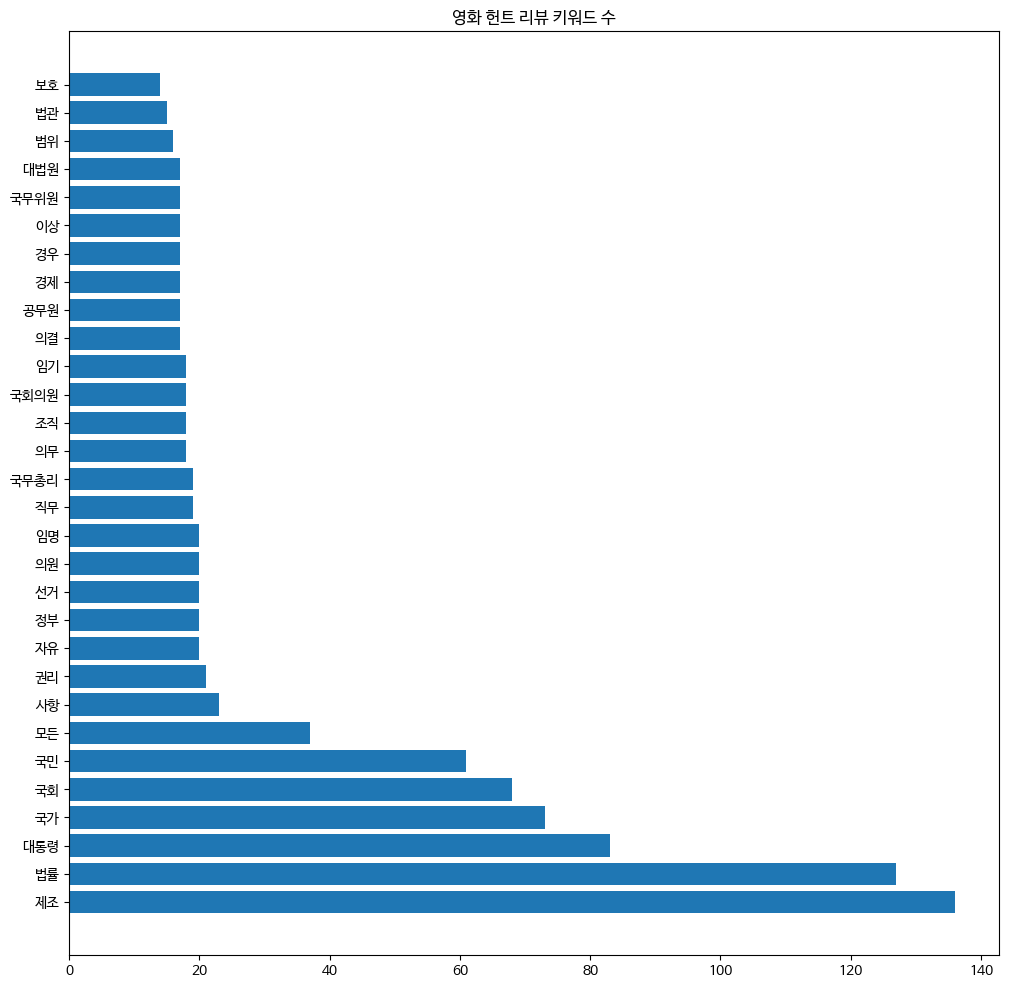

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.figure(figsize=(12, 12))               # 이미지 사이즈를 설정하고 이미지 생성
y_height = range(0, len(top_nouns))       # y축 높이 지정
plt.barh(y_height, top_nouns.values())     # 수평막대 그리기
plt.title("영화 헌트 리뷰 키워드 수")      #  차트 제목 설정
plt.yticks(y_height, top_nouns.keys())     #  y축 틱에 label 붙이기
plt.show()

* Squrify 트리맵 그리기

In [15]:
!pip install squarify

<Axes: >

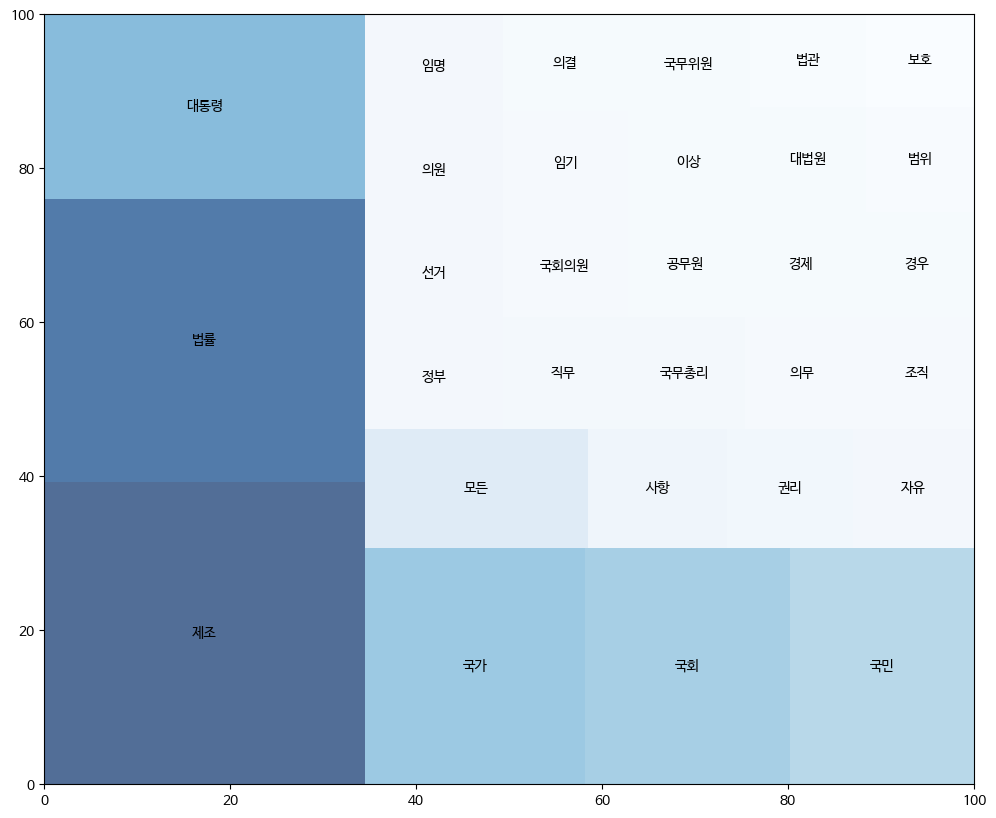

In [16]:
import squarify
import matplotlib as mpl

plt.figure(figsize=(12, 10))

# 빈도값을 0~1까지 값을 갖도록 min-max 표준화
norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))

# 정규화된 값을 matplotlib의 cm(color map)에서 Blue 에 적용
colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]

# squarify Plot생성(label 단어, 박스 크기는 빈도, 색상 cm.Blue, 투명도는 30%
squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=.7)

In [17]:
!pip install wordcloud STOPWORDS

In [15]:
# import glob
# font_list = glob.glob('C:/Windows/Fonts/h*.*')
# len(font_list), font_list

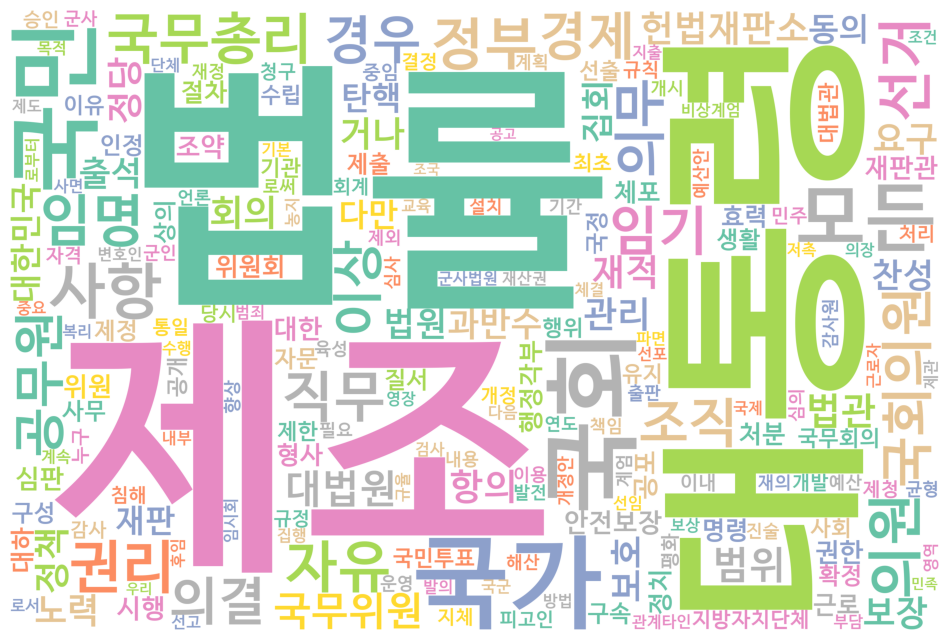

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 배경색과 폰트지정
wc = WordCloud(width = 3000, height = 2000, random_state=1, 
              background_color='white', colormap='Set2', 
              collocations=False, stopwords = STOPWORDS,
              font_path='C:/Windows/Fonts/Hancom Gothic Bold.ttf')

# 워드클아우드 생성
wc.generate_from_frequencies(nouns_counter)    # 빈도수가 구해진 전체 단어

# pyplot을 이용해 시각화
plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [23]:
## wordcloud에 등록되어 있는 불용어 (STOPWORDS)
len(STOPWORDS), type(STOPWORDS), STOPWORDS

(192,
 set,
 {'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'all',
  'also',
  'am',
  'an',
  'and',
  'any',
  'are',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  "can't",
  'cannot',
  'com',
  'could',
  "couldn't",
  'did',
  "didn't",
  'do',
  'does',
  "doesn't",
  'doing',
  "don't",
  'down',
  'during',
  'each',
  'else',
  'ever',
  'few',
  'for',
  'from',
  'further',
  'get',
  'had',
  "hadn't",
  'has',
  "hasn't",
  'have',
  "haven't",
  'having',
  'he',
  "he'd",
  "he'll",
  "he's",
  'hence',
  'her',
  'here',
  "here's",
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  "how's",
  'however',
  'http',
  'i',
  "i'd",
  "i'll",
  "i'm",
  "i've",
  'if',
  'in',
  'into',
  'is',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'k',
  "let's",
  'like',
  'me',
  'more',
  'most',
  "mustn't",
  'my',
  'myself',
  'n

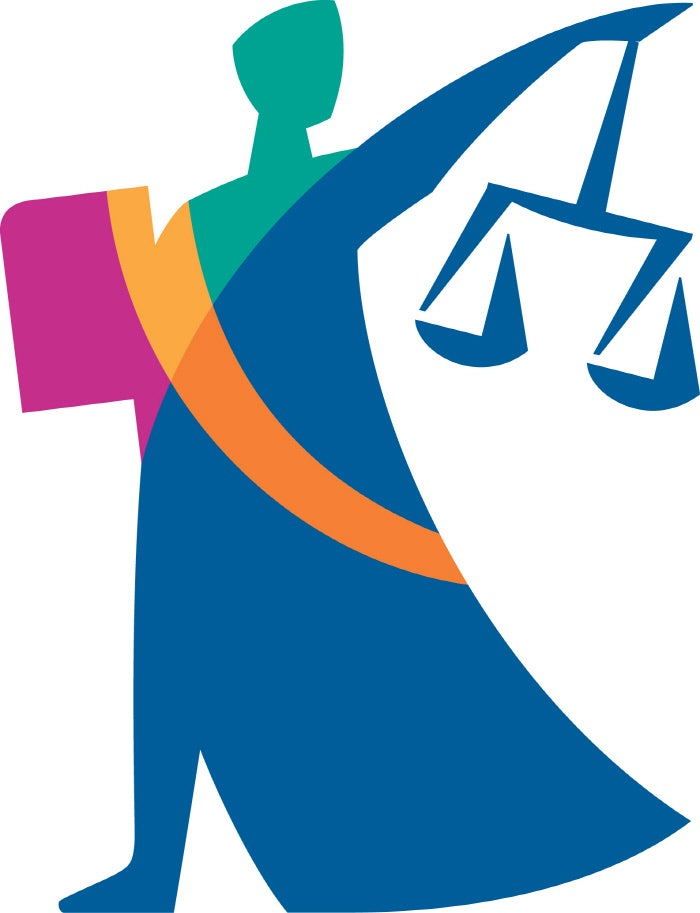

In [24]:
import numpy as np
from PIL import Image

mask = np.array(Image.open("law.jpg"))
Image.fromarray(mask)

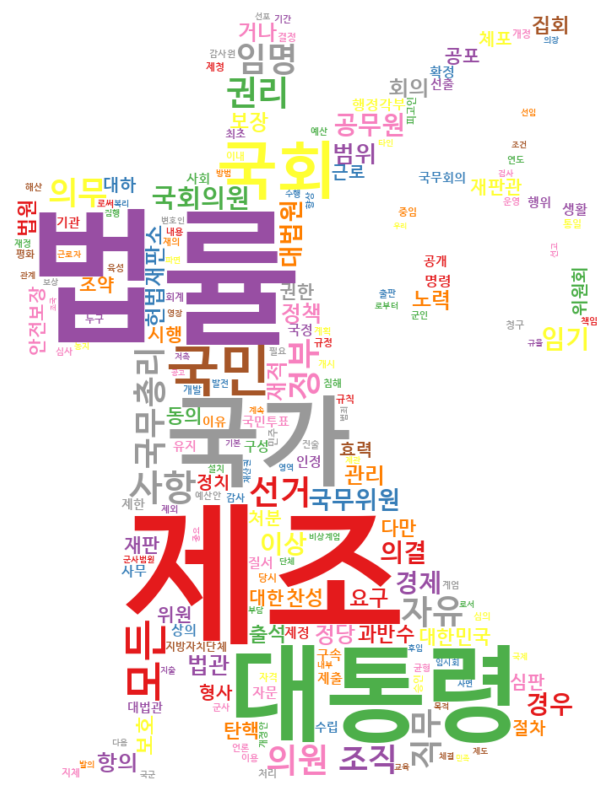

In [25]:
from wordcloud import WordCloud, STOPWORDS      # WordCloud와 STOPWORD 호출
import matplotlib.pyplot as plt                 # matplotlib.pyplot를 plt로 단축
import numpy as np                              # 이미지를 array 데이터로 변환
from PIL import Image                           # 이미지 분석 및 처리

mask = np.array(Image.open("law.jpg")) # 이미지를 불어와 arrary 데이터로 변환

wc = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='Set1', 
                      collocations=False, stopwords = STOPWORDS,
                      font_path='C:/Windows/Fonts/Hancom Gothic Bold.ttf',
                      mask=mask)

wc.generate_from_frequencies(nouns_counter)            # 워드 클라우드 생성

plt.figure(figsize=(10,10))                            # 이미지 크기 지정
plt.imshow(wc, interpolation="bilinear")               # 픽셀을 부드럽게 색으로 채움
plt.axis("off")
plt.show()

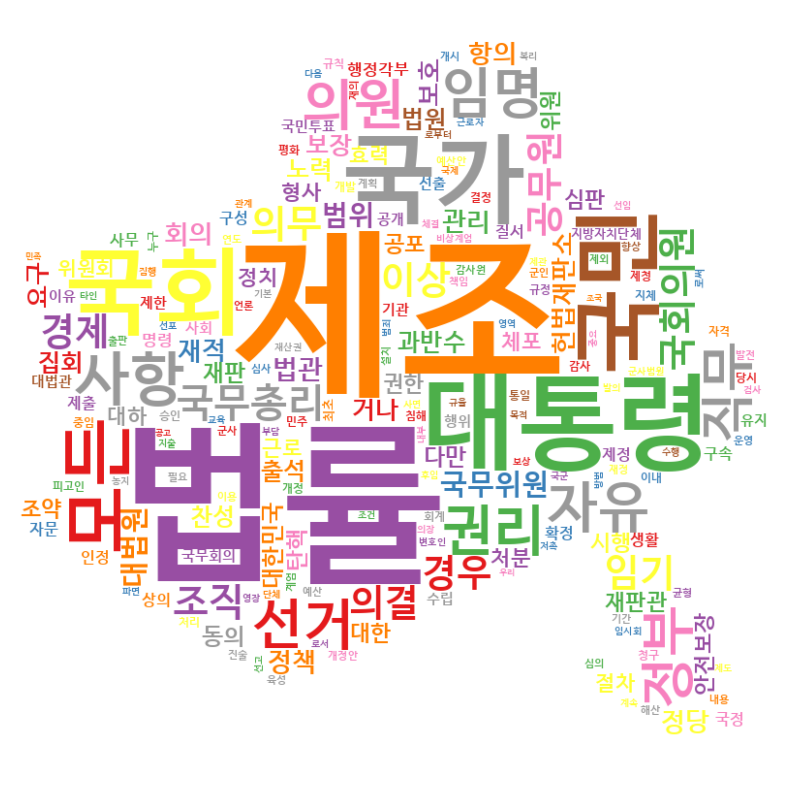

In [26]:
from wordcloud import WordCloud, STOPWORDS  # WordCloud와 STOPWORD 호출
import matplotlib.pyplot as plt             # matplotlib.pyplot를 plt로 단축
import numpy as np                          # 이미지를 array 데이터로 변환
from PIL import Image                       # 이미지 분석 및 처리

mask = np.array(Image.open("legal_book.jpg")) # 이미지를 불어와 arrary 데이터로 변환

wc = WordCloud(width = 3000, height = 2000, random_state=1, 
               background_color='white', colormap='Set1', 
               collocations=False, stopwords = STOPWORDS, 
               font_path='C:/Windows/Fonts/Hancom Gothic Bold.ttf',
               mask=mask)
               # mask=trans_mask)

wc.generate_from_frequencies(nouns_counter)            # 워드 클라우드 생성

plt.figure(figsize=(10,10))               # 이미지 크기 지정
plt.imshow(wc, interpolation="bilinear")   # 픽셀을 부드럽게 색으로 채움
plt.axis("off")
plt.show()

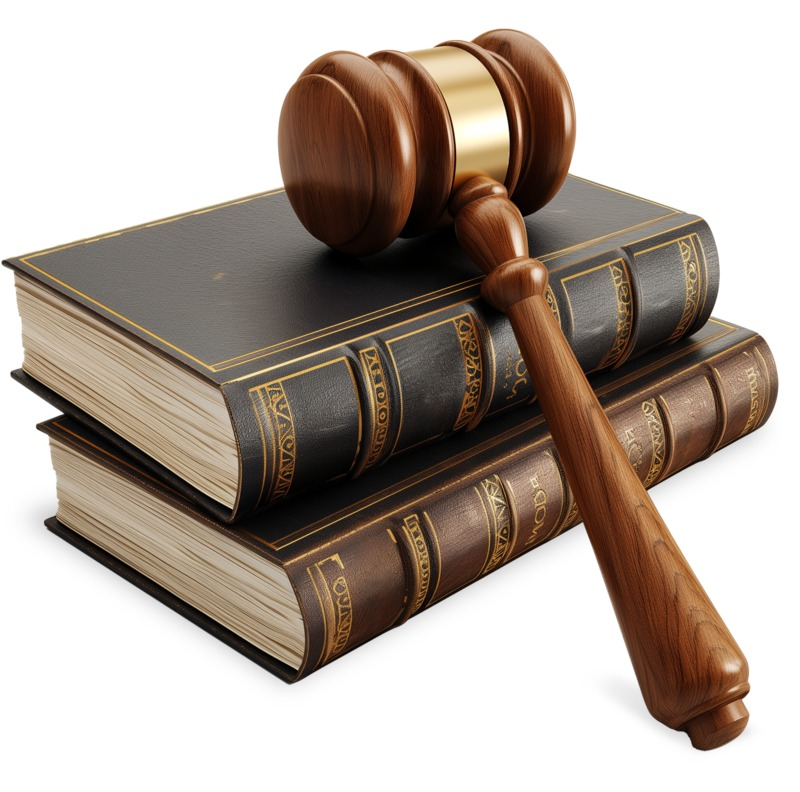

In [36]:
Image.fromarray(mask) # 이미지 확인

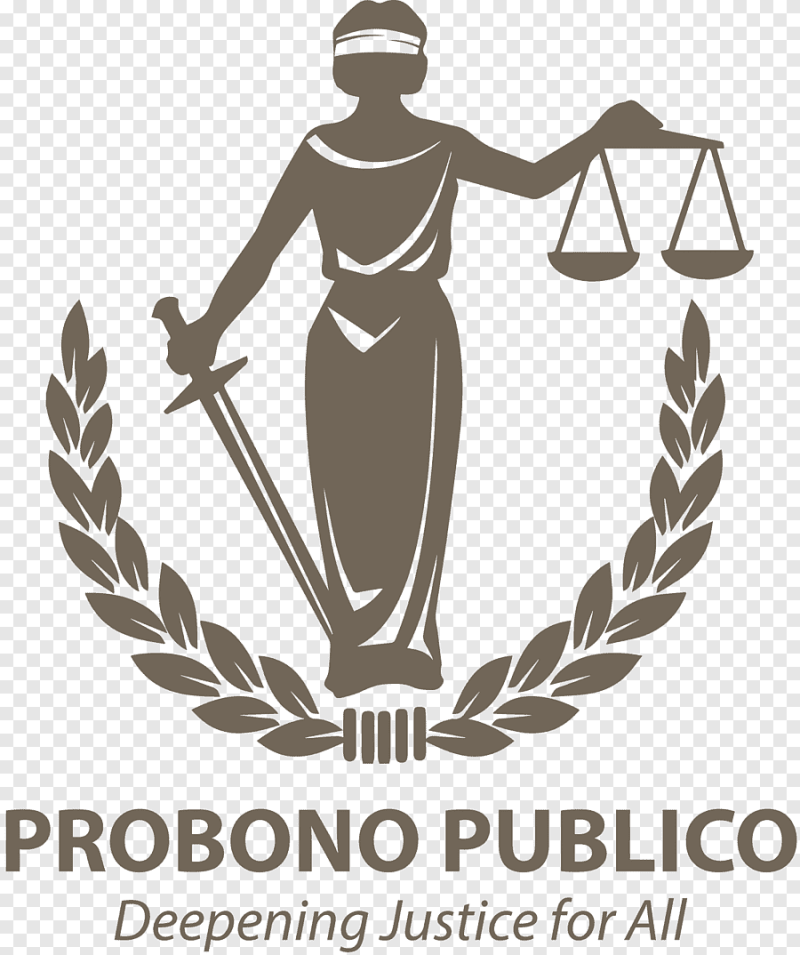

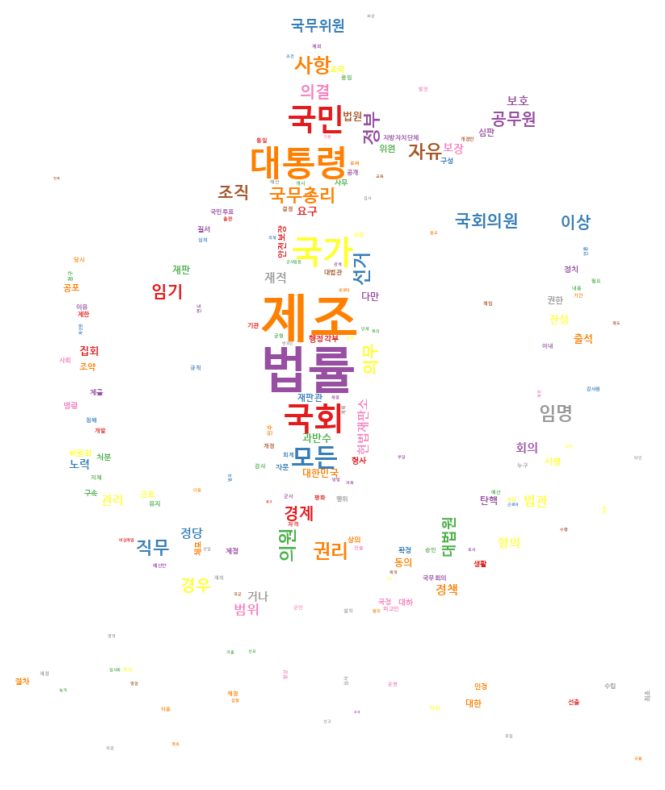

In [27]:
mask = np.array(Image.open("law_logo.png"))
display(Image.fromarray(mask))
wc = WordCloud(width = 3000, height = 2000, random_state=1, 
               background_color='white', colormap='Set1', 
               collocations=False, stopwords = STOPWORDS, 
               font_path='C:/Windows/Fonts/Hancom Gothic Bold.ttf',
               mask=mask)
               # mask=trans_mask)

wc.generate_from_frequencies(nouns_counter)            # 워드 클라우드 생성

plt.figure(figsize=(10,10))                # 이미지 크기 지정
plt.imshow(wc, interpolation="bilinear")   # 픽셀을 부드럽게 색으로 채움
plt.axis("off")
plt.show()